In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2
from numpy.fft import ifft2, ifftshift

In [ ]:
# import torch
# from torchvision.models.detection import fasterrcnn_resnet50_fpn

# # Load the pre-trained model
# model = fasterrcnn_resnet50_fpn(pretrained=True)
# model.eval()  # Set it to evaluation mode

# # Save the model
# model_path = "fasterrcnn_resnet50_fpn.pth"
# torch.save(model.state_dict(), model_path)

In [ ]:
# img_shown = cv2.imread(r'static/images/displayed_fourrier.png')

In [ ]:
# img_shown

In [3]:
# Specify the file path where you saved the pickle file
file_path = 'image_data_before.pickle'

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data_initial = pickle.load(file)

In [4]:
np.array(loaded_data_initial).shape

(500, 500, 3)

In [ ]:
# loaded_data.reshape(130,280,3).shape

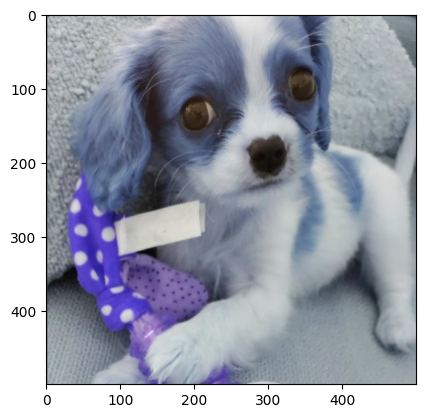

In [5]:
plt.imshow(loaded_data_initial)

In [ ]:
loaded_data_initial.shape

In [6]:

# Specify the file path where you saved the pickle file
file_path = 'image_data_after.pickle'

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data_after = pickle.load(file)

# print('Loaded data:', loaded_data)

In [7]:
np.array(loaded_data_after).shape

()

TypeError: Image data of dtype <U424632 cannot be converted to float

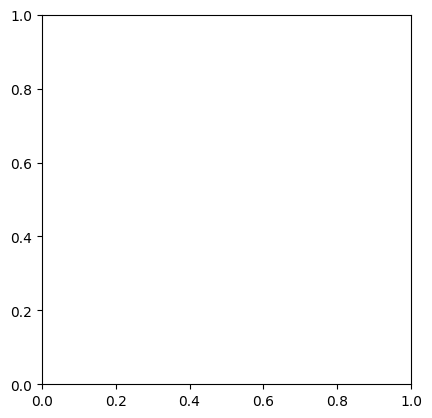

In [8]:
plt.imshow(loaded_data_after)

In [ ]:
file_path = 'image_data_after_histr.pickle'

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    loaded_data_after_histr = pickle.load(file)

In [ ]:
loaded_data_after_histr

In [ ]:
plt.imshow(loaded_data_after_histr)

In [ ]:
img = cv2.imread(r"static\images\elephant.jpg")

In [ ]:
plt.imshow(img)

In [ ]:
def convert_to_grayscale(img):
    image_8u = cv2.convertScaleAbs(img)
    gray_image = cv2.cvtColor(image_8u, cv2.COLOR_RGB2GRAY)
    return gray_image

In [ ]:
def calculate_2dft(input):
    ft = np.fft.fft2(input)
    ft = np.fft.fftshift(ft)  # Shift the zero frequency components to the center
    return ft

def high_pass_filter_fft(ft, cutoff_frequency):
    rows, cols = ft.shape
    crow, ccol = rows // 2, cols // 2  # Center
    mask = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) >= cutoff_frequency:
                mask[i, j] = 1
                
    # Apply the high-pass filter directly to the Fourier transformed data
    fft_filtered = ft * mask
    return fft_filtered

def low_pass_filter_fft(ft, cutoff_frequency):
    rows, cols = ft.shape
    crow, ccol = rows // 2, cols // 2  # Center
    mask = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= cutoff_frequency:
                mask[i, j] = 1
                
    # Apply the low-pass filter directly to the Fourier transformed data
    fft_filtered = ft * mask
    return fft_filtered

def inverse_Fourier(ft):
    ift = np.fft.ifftshift(ft)  # Undo the shift to prepare for the inverse FFT
    ift = np.fft.ifft2(ift)  # Apply the inverse FFT
    ift = ift.real  # Take the real part of the result
    return ift

# Your image processing pipeline should look like this:
img = cv2.imread(r'static\images\elephant.jpg')
gray_img = convert_to_grayscale(img)
ft = calculate_2dft(gray_img)
# Apply the high-pass filter to the Fourier transform, not the log spectrum
# filtered_ft = high_pass_filter_fft(ft, 10)
filtered_ft = low_pass_filter_fft(ft, 100)
# Then take the inverse Fourier transform of the filtered data
filtered_img = inverse_Fourier(filtered_ft)
plt.imshow(filtered_img, cmap='gray')  # Ensure grayscale display


In [ ]:
bgr_img = cv2.imread('static\images\elephant.jpg')

In [ ]:
plt.imshow(bgr_img )

In [ ]:
rgb_swapped_image = cv2.cvtColor(bgr_img , cv2.COLOR_RGB2BGR)
plt.imshow(rgb_swapped_image)

In [ ]:
hsv_colour_swapped_image = cv2.cvtColor(rgb_swapped_image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_colour_swapped_image)

In [ ]:
hsv_colour_swapped_image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_colour_swapped_image)

In [ ]:
    if image_colour_choice == 'bgrColour':
        if image_current_colour_scheme == 'bgrColour':
            
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
            print('1')
        elif image_current_colour_scheme == 'hsvColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_HSV2BGR)
            print('2')
        elif image_current_colour_scheme == 'rgbColour':
            
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
            print('3')
    
    if image_colour_choice == 'hsvColour':
        if image_current_colour_scheme == 'hsvColour':
            colour_swapped_image = image_array
            print('4')
        elif image_current_colour_scheme == 'bgrColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2HSV)
            print('5')
        elif image_current_colour_scheme == 'rgbColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2HSV)
            print('6')
    
    if image_colour_choice == 'rgbColour':
        if image_current_colour_scheme == 'rgbColour':
            colour_swapped_image = image_array
            print('7')
        elif image_current_colour_scheme == 'bgrColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
            print('8')
        elif image_current_colour_scheme == 'hsvColour':
            colour_swapped_image = cv2.cvtColor(image_array, cv2.COLOR_HSV2RGB)

In [3]:
!pip install pdf2image

In [6]:
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import os

def pdf_to_text(pdf_path, output_folder, dpi=300):
    # Convert PDF to images
    pages = convert_from_path(pdf_path, dpi)

    text = ""

    # Iterate through all the pages stored above
    for i, page in enumerate(pages):
        # Save the page as an image
        image_path = os.path.join(output_folder, f"page_{i + 1}.png")
        page.save(image_path, 'PNG')

        # Use Tesseract to extract text from the image
        page_text = pytesseract.image_to_string(Image.open(image_path))
        text += page_text + "\n\n"

    return text

# Example usage
pdf_path = r"C:\Users\user\OneDrive\Desktop\Doron_Ben_Chayim_CV.pdf"
output_folder = r'Desktop'

# Make sure output folder exists
os.makedirs(output_folder, exist_ok=True)

text = pdf_to_text(pdf_path, output_folder)
print(text)


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [7]:
!pip install pytesseract pdf2image pillow


In [10]:
import openai

import os

import pandas as pd

import time

In [29]:
openai.api_key = 'sk-proj-ey9HaAasc8rx777LUwlgT3BlbkFJ9OGQHnfkMuvhG8QxDkzc'

In [32]:
import openai

# Define the prompt
prompt_text = "Once upon a time,"

# Generate text completion
response = openai.Completion.create(
    engine="gpt-3.5-turbo",  # Specify the model
    prompt=prompt_text,
    max_tokens=1  # Adjust as needed
)

# Extract and print the generated text
generated_text = response.choices[0].text.strip()
print("Generated Text:", generated_text)


RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.

In [20]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)

ImportError: cannot import name 'OpenAI' from 'openai' (c:\Users\user\anaconda3\lib\site-packages\openai\__init__.py)

In [14]:
prompt = "Is anybody out there?"

response = get_completion(prompt)

print(response)

AttributeError: module 'openai' has no attribute 'ChatCompletion'